In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import spacy
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [9]:
df = pd.read_csv('Ecommerce_data.csv')
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [10]:
df.label.value_counts()

label
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: count, dtype: int64

In [11]:
df["label_num"] = df.label.map({
    'Household' : 0, 
    'Books': 1, 
    'Electronics': 2, 
    'Clothing & Accessories': 3
})

In [12]:
df.head()

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3


In [ ]:
df['preprocessed_text'] = df['Text'].apply(preprocess) 

In [14]:
# Train Test Split
from sklearn.model_selection import train_test_split
X = df['preprocessed_text']
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
vectorizer = TfidfVectorizer()  
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9633333333333334
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1200
           1       0.98      0.93      0.96      1200
           2       0.97      0.97      0.97      1200
           3       0.98      0.98      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



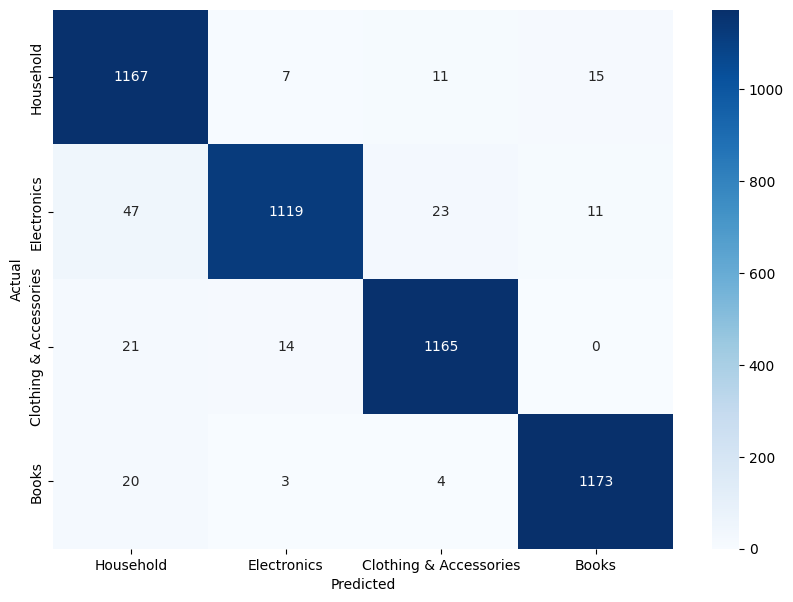

In [17]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df.label.unique(), yticklabels=df.label.unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()